In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# preprocessors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

# Load Data

Dataset Link: https://drive.google.com/file/d/1U5xHhWqxermxS5FnaCZdNeqDgUUclyO7/view

In [2]:
df = pd.read_csv('Training Data.csv')

# Explore the Data

In [3]:
df.shape

(252000, 13)

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# Cleaning the Data

In [6]:
df.drop('Id',axis = 1,inplace=True)

In [7]:
df.shape

(252000, 12)

In [8]:
df.duplicated(keep=False).value_counts()

True     215993
False     36007
dtype: int64

In [9]:
df = df.drop_duplicates()
df = df.groupby(df.index).first()

In [10]:
df.shape

(43190, 12)

In [11]:
df.duplicated(keep=False).value_counts()

False    43190
dtype: int64

# Data Visualization

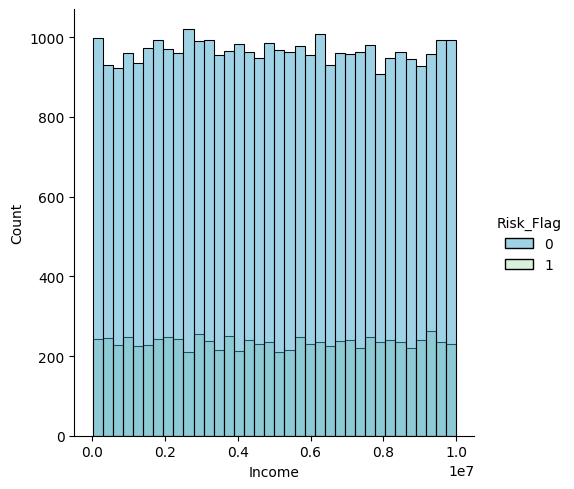

In [12]:
sns.displot(x='Income',hue='Risk_Flag',palette='GnBu_r',data=df)

[]

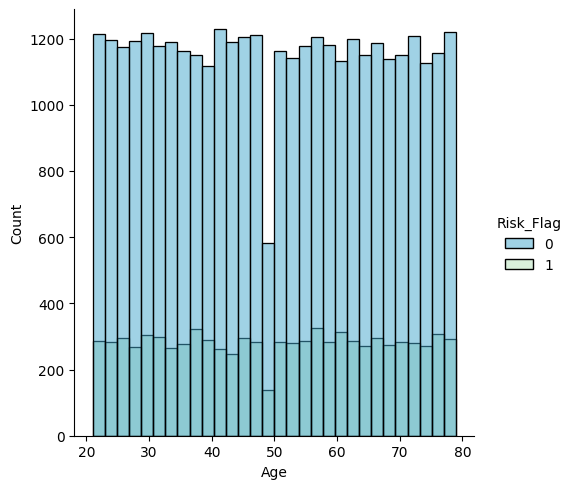

In [13]:
sns.displot(df, x="Age",palette='GnBu_r', hue="Risk_Flag",bins=30)
plt.plot()

<Axes: xlabel='Married/Single', ylabel='count'>

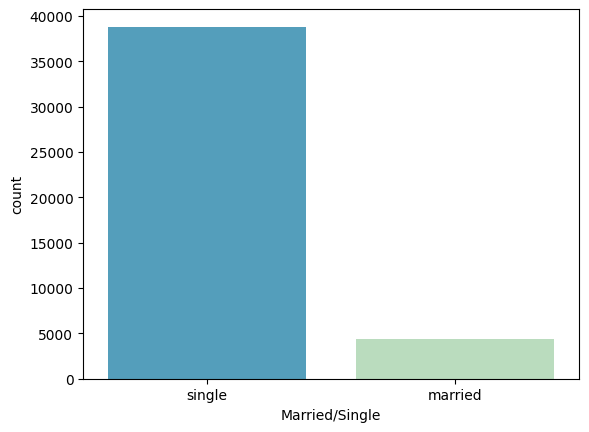

In [14]:
sns.countplot(x='Married/Single',palette='GnBu_r',data=df)

<Axes: xlabel='House_Ownership', ylabel='count'>

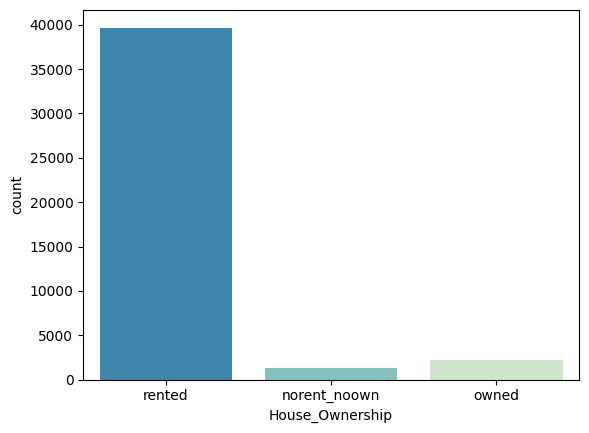

In [15]:
sns.countplot(x='House_Ownership',palette='GnBu_r',data=df)


<Axes: xlabel='Car_Ownership', ylabel='count'>

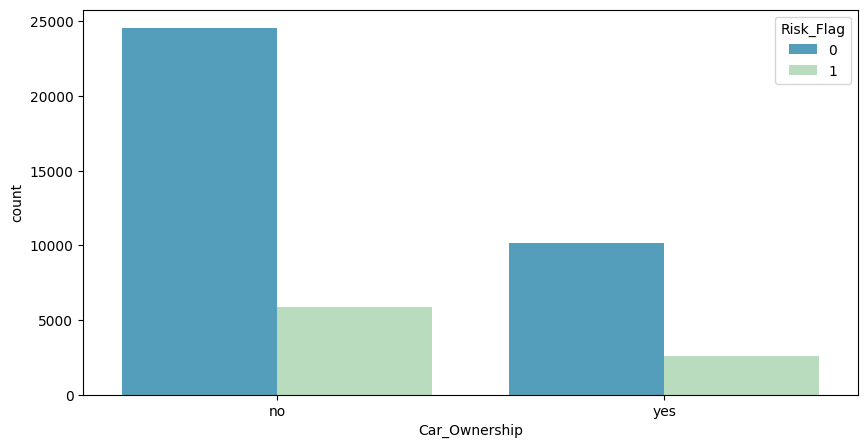

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Car_Ownership',palette='GnBu_r',hue='Risk_Flag',data=df)


<Axes: xlabel='count', ylabel='Profession'>

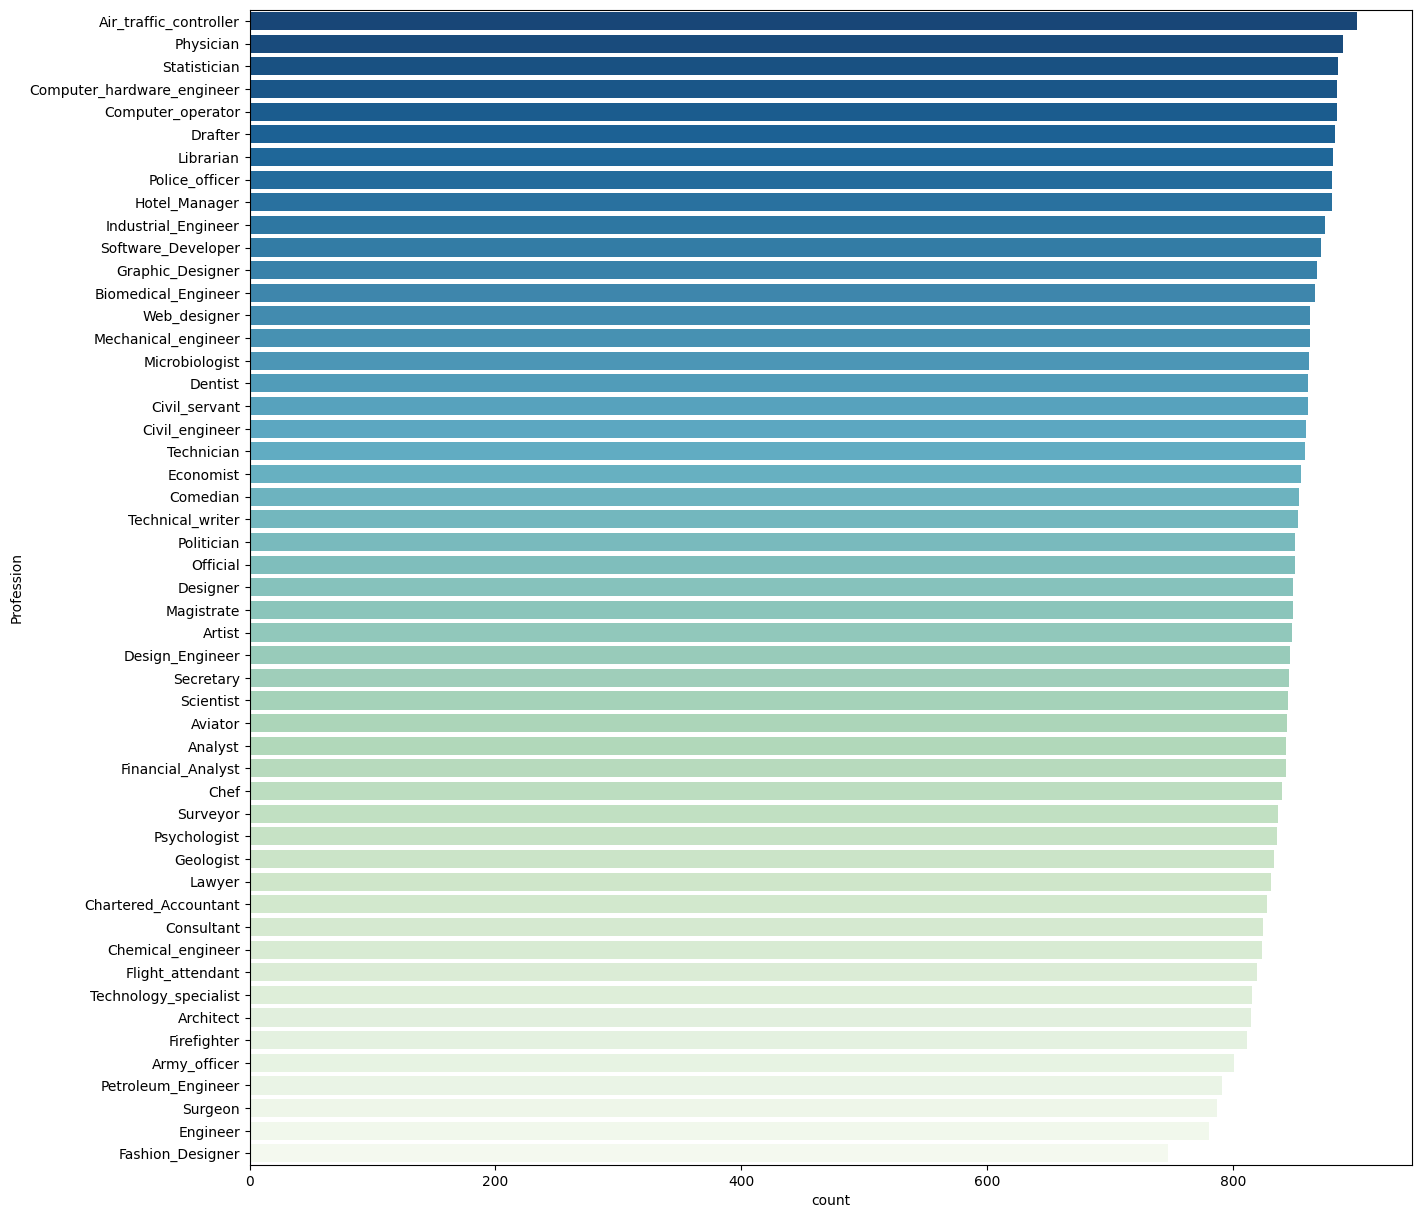

In [17]:
plt.figure(figsize=(15,15))

sns.countplot(y=df['Profession'],order=df['Profession'].value_counts().index,palette='GnBu_r')

<Axes: >

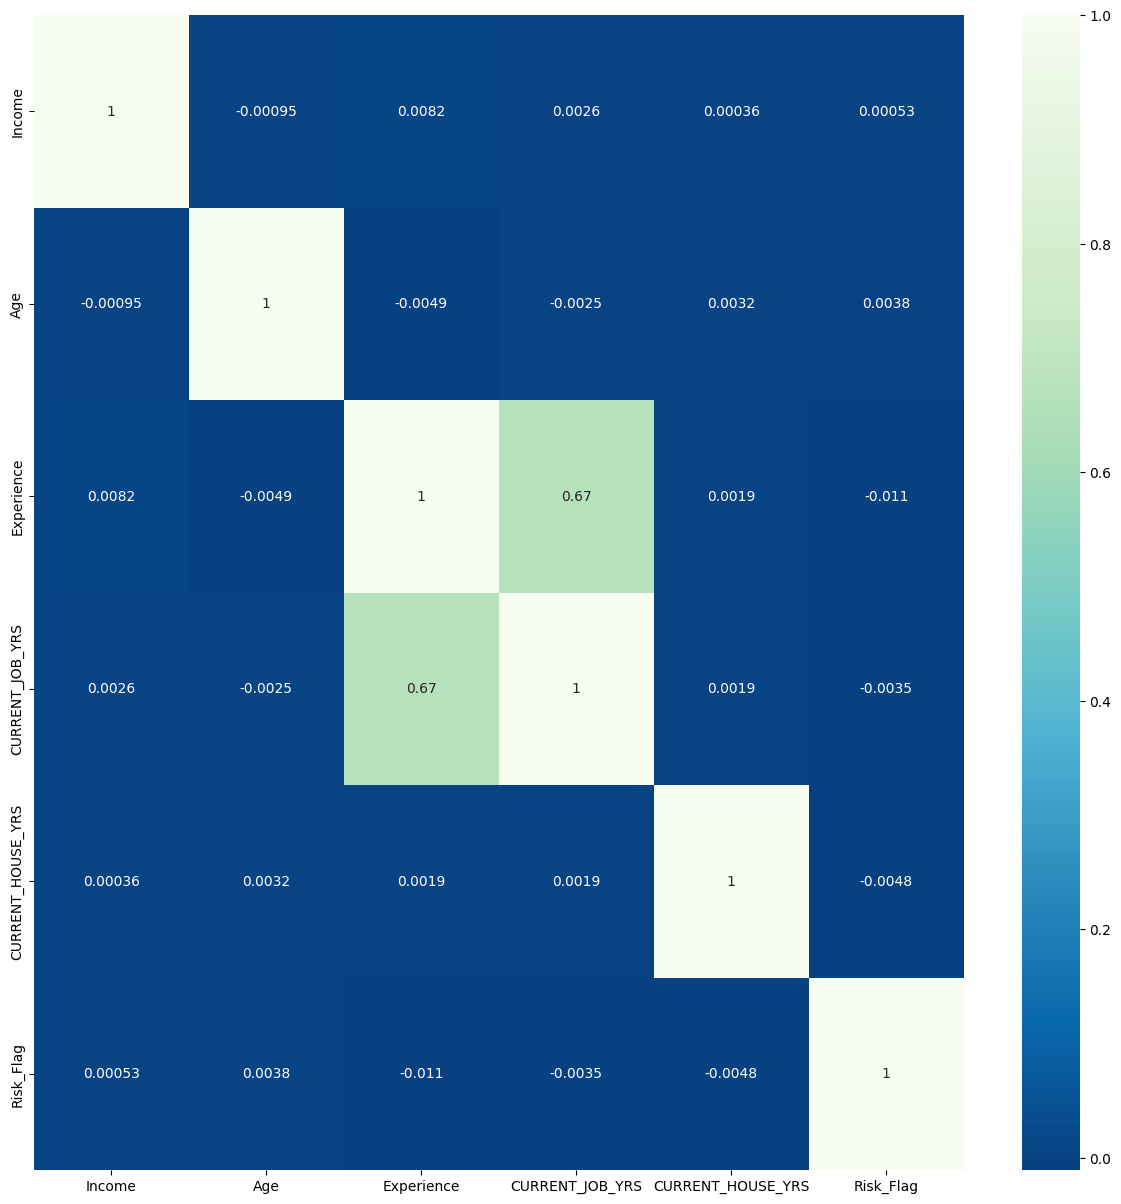

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap="GnBu_r")

# Data Preprocessing

In [18]:
df.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43190 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             43190 non-null  int64 
 1   Age                43190 non-null  int64 
 2   Experience         43190 non-null  int64 
 3   Married/Single     43190 non-null  object
 4   House_Ownership    43190 non-null  object
 5   Car_Ownership      43190 non-null  object
 6   Profession         43190 non-null  object
 7   CITY               43190 non-null  object
 8   STATE              43190 non-null  object
 9   CURRENT_JOB_YRS    43190 non-null  int64 
 10  CURRENT_HOUSE_YRS  43190 non-null  int64 
 11  Risk_Flag          43190 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.3+ MB


In [20]:
exclude = ['Risk_Flag','STATE','CITY','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']
numeric = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
categorical = ['Profession']
dummies = ['Married/Single', 'House_Ownership', 'Car_Ownership']

In [21]:
for n in numeric:
    print(n,df[n].value_counts().shape)

Income (41920,)
Age (59,)
Experience (21,)
CURRENT_JOB_YRS (15,)
CURRENT_HOUSE_YRS (5,)


In [22]:
for c in categorical:
    print(c,df[c].value_counts().shape)

Profession (51,)


In [23]:
pf = pd.get_dummies(df,columns=dummies)

In [24]:
for col in categorical:
    pf[col] = LabelEncoder().fit_transform(pf[col])

In [25]:
pf

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,1303834,23,3,33,Rewa,Madhya_Pradesh,3,13,0,0,1,0,0,1,1,0
1,7574516,40,10,43,Parbhani,Maharashtra,9,13,0,0,1,0,0,1,1,0
2,3991815,66,4,47,Alappuzha,Kerala,4,10,0,1,0,0,0,1,1,0
3,6256451,41,2,43,Bhubaneswar,Odisha,2,12,1,0,1,0,0,1,0,1
4,5768871,47,11,11,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,45,Kolkata,West_Bengal,6,11,0,0,1,0,0,1,1,0
251996,2843572,26,10,3,Rewa,Madhya_Pradesh,6,11,0,0,1,0,0,1,1,0
251997,4522448,46,7,17,Kalyan-Dombivli,Maharashtra,7,12,0,0,1,0,0,1,1,0
251998,6507128,45,0,27,Pondicherry,Puducherry,0,10,0,0,1,0,0,1,1,0


# Feature separation

In [26]:
X = pf.drop(exclude, axis=1)
y = pf["Risk_Flag"]

# Standard Scaling

In [27]:
sc = StandardScaler()
X = sc.fit_transform(X)

# MinMax Scaling

In [28]:
# sc = MinMaxScaler()
# X = sc.fit_transform(X)

# Synthetic Minority Over-sampling Technique

In [29]:
print('X.shape: ',X.shape,'\ny.shape: ',y.shape)
print('Risk Flag\n',y.value_counts())

X.shape:  (43190, 11) 
y.shape:  (43190,)
Risk Flag
 0    34747
1     8443
Name: Risk_Flag, dtype: int64


In [30]:
X, y = SMOTE().fit_resample(X, y)

In [31]:
print('X.shape: ',X.shape,'\ny.shape: ',y.shape)
print('Risk Flag\n',y.value_counts())

X.shape:  (69494, 11) 
y.shape:  (69494,)
Risk Flag
 0    34747
1    34747
Name: Risk_Flag, dtype: int64


# Spliting Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random.randint(100))

In [33]:
### utility function for testing testcases
def tester(x,y,model):

    # testing
    y_pred = model.predict(x)

    # printing model names
    print(f'{repr(model)}')

    # classification report
    c_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    print(c_report)

    # other metrix
    print(f'accuracy_score: {accuracy_score(y,y_pred)*100:.2f}')
    print(f'precision_score: {precision_score(y,y_pred)*100:.2f}')
    print(f'recall_score: {recall_score(y,y_pred)*100:.2f}')
    print(f'f1-score: {f1_score(y,y_pred)*100:.2f}')

# **Models We Used**


# Logistic Regresstion


In [34]:
LR_clf = LogisticRegression(random_state=np.random.randint(100))
LR_clf.fit(X_train, y_train)
tester(X_test,y_test,LR_clf)

LogisticRegression(random_state=16)
              precision    recall  f1-score       support
0              0.504963  0.503587  0.504274   6970.000000
1              0.502015  0.503392  0.502702   6929.000000
accuracy       0.503489  0.503489  0.503489      0.503489
macro avg      0.503489  0.503489  0.503488  13899.000000
weighted avg   0.503493  0.503489  0.503491  13899.000000
accuracy_score: 50.35
precision_score: 50.20
recall_score: 50.34
f1-score: 50.27


# Naive Bayes | Gaussian

In [35]:
GNB_clr = GaussianNB()
GNB_clr.fit(X_train, y_train)
tester(X_test,y_test,GNB_clr)

GaussianNB()
              precision    recall  f1-score       support
0              0.504892  0.629268  0.560261   6970.000000
1              0.504221  0.379276  0.432913   6929.000000
accuracy       0.504641  0.504641  0.504641      0.504641
macro avg      0.504557  0.504272  0.496587  13899.000000
weighted avg   0.504558  0.504641  0.496775  13899.000000
accuracy_score: 50.46
precision_score: 50.42
recall_score: 37.93
f1-score: 43.29


# Support Vector Machine

In [36]:
svc_clf = SVC(kernel='linear', max_iter=1000)
svc_clf.fit(X_train,y_train)
tester(X_test,y_test,svc_clf)

SVC(kernel='linear', max_iter=1000)
              precision    recall  f1-score       support
0              0.504960  0.292109  0.370115   6970.000000
1              0.499949  0.711935  0.587402   6929.000000
accuracy       0.501403  0.501403  0.501403      0.501403
macro avg      0.502455  0.502022  0.478758  13899.000000
weighted avg   0.502462  0.501403  0.478438  13899.000000
accuracy_score: 50.14
precision_score: 49.99
recall_score: 71.19
f1-score: 58.74


# K-nearest neighbor

In [37]:
KN_clf = KNeighborsClassifier(n_neighbors=1)
KN_clf.fit(X_train,y_train)
tester(X_test,y_test,KN_clf)

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score       support
0              0.859536  0.669871  0.752943   6970.000000
1              0.728239  0.889883  0.800987   6929.000000
accuracy       0.779552  0.779552  0.779552      0.779552
macro avg      0.793888  0.779877  0.776965  13899.000000
weighted avg   0.794081  0.779552  0.776894  13899.000000
accuracy_score: 77.96
precision_score: 72.82
recall_score: 88.99
f1-score: 80.10


# Random Forest

In [38]:
RF_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=1000)
RF_clf.fit(X_train,y_train)
tester(X_test,y_test,RF_clf)

RandomForestClassifier(max_leaf_nodes=1000, n_estimators=1000, random_state=1)
              precision    recall  f1-score       support
0              0.766913  0.865280  0.813132   6970.000000
1              0.844408  0.735460  0.786177   6929.000000
accuracy       0.800561  0.800561  0.800561      0.800561
macro avg      0.805660  0.800370  0.799655  13899.000000
weighted avg   0.805546  0.800561  0.799694  13899.000000
accuracy_score: 80.06
precision_score: 84.44
recall_score: 73.55
f1-score: 78.62


# Extreme Gradient Boosting

In [39]:
XGB_clf = XGBClassifier(learning_rate=0.1,
                    n_estimators=400,
                    random_state=np.random.randint(1000))
XGB_clf.fit(X_train,y_train)
tester(X_test,y_test,XGB_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=522, ...)
              precision    recall  f1-score       support
0              0.796900  0.995839  0.885332   6970.000000
1              0.994411  0.744696  0.851626   6929.000000
accuracy       0.870638  0.870638  0.870638      0.870638
macro avg      0.8